In [71]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mixture import discrete_sampler
from update_progress import update_progress
from CG_solver import CG_solver

In [19]:
def create_cluster(Z, m):
    n = len(Z)
    cluster = [0 for _ in range(m)]
    X = [i for i in range(n)]
    for j in range(m):
        i = discrete_sampler(X,Z)
        cluster[j] = i
    return cluster

In [31]:
def generate_erm_graph(Z, pi, m, n):
    cluster = create_cluster(Z, n)
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            u = np.random.random()
            if u < pi[cluster[i]][cluster[j]]:
                C[i][j] = 1
                C[j][i] = 1
    return (C + C.T)/2

In [76]:
Z = [0.1, .2, 0.7]
pi = 2*np.array([[0.15, 0.01, 0.01], [0, 0.155, 0.01], [0, 0, 0.18]])
pi = (pi + pi.T)/2
print(pi)
m = 3
n = 100
C = generate_erm_graph(Z, pi, m, n)

[[0.3  0.01 0.01]
 [0.01 0.31 0.01]
 [0.01 0.01 0.36]]


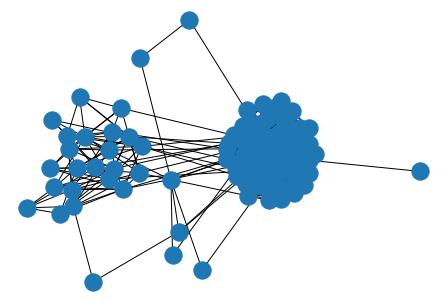

In [77]:
G = nx.Graph()
for i in range(n):
    for j in range(n):
        if C[i][j] != 0:
            G.add_edge(i, j)
nx.draw(G)
plt.show()

In [85]:
m = 3
n = 50
L = 20
a = 5
B = np.linspace(0.2, 0.8, L)
dist = []
C_bar = np.eye(m)
pi = 2*np.array([[0.15, 0.01, 0.01], [0, 0.155, 0.01], [0, 0, 0.18]])
alpha_0 = [0.8, 0.19, 0.01]
alpha_1 = [0.5, 0.3, 0.2]
alpha_2 = [0.1, 0.2, 0.7]
Alpha = [alpha_0, alpha_1, alpha_2]
RES = []
u = 0
for alpha in Alpha:
    b_alpha = []
    C = generate_erm_graph(alpha, pi, m, n)
    for b in B:
        update_progress(u/60)
        h = [0 for i in range(n)]
        for i in range(n):
            res = 0
            for j in range(n):
                if C[i][j] != 0:
                    res += 1
            h[i] = np.power(res + a, b)
        h = np.array(h)
        h = 1/np.sum(h)*h
        #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
        #h = 1/np.sum(h)*h
        h_bar = np.array([1/m for i in range(m)])
        T = h[:,None]*h_bar[None,:]
        D = np.zeros((n,m))
        for i in range(min(n,m)):
            D[i][i] = 10
        #T = np.zeros((n,m))
        #for i in range(n):
        #    T[i][0] = h[i]*0.7
        #    T[i][1] = h[i]*0.3

        solver = CG_solver(T, C, C_bar, h, D)
        T = solver.run(10e-3)
        one = np.array([1 for i in range(n)])
        one_3 = np.array([1 for i in range(m)])
        b_alpha.append([b, T.T@one])
        u += 1
    RES.append(b_alpha)

Percent: [##########] 98.33% 

In [75]:
b = 0.5
h = [0 for i in range(n)]
C = generate_erm_graph(alpha, pi, m, n)
for i in range(n):
    res = 0
    for j in range(n):
        if C[i][j] != 0:
            res += 1
    h[i] = np.power(res + a, b)
h = np.array(h)
h = 1/np.sum(h)*h
#h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
#h = 1/np.sum(h)*h
D = np.zeros((n,m))
T = np.zeros((n,m))
for i in range(n):
    T[i][0] = h[i]*0.7
    T[i][1] = h[i]*0.3

solver = CG_solver(T, C, C_bar, h, D)
T = solver.run(10e-3)
one = np.array([1 for i in range(n)])
one_3 = np.array([1 for i in range(m)])
print(T.T@one)

[0.33701963 0.32925746 0.33372291]


In [74]:
print(alpha)

[0.1, 0.2, 0.7]


In [80]:
print(RES)

[[[0.2, array([0.29321732, 0.35216725, 0.35461543])], [0.23157894736842108, array([0.31427451, 0.34206172, 0.34366378])], [0.26315789473684215, array([0.31247439, 0.34359252, 0.34393309])], [0.2947368421052632, array([0.31626709, 0.34118291, 0.34255   ])], [0.3263157894736842, array([0.29626314, 0.34898912, 0.35474774])], [0.3578947368421053, array([0.2995523 , 0.34424509, 0.35620261])], [0.38947368421052636, array([0.30232041, 0.35587842, 0.34180117])], [0.42105263157894746, array([0.29975309, 0.35351371, 0.34673321])], [0.4526315789473685, array([0.30788209, 0.35532328, 0.33679463])], [0.48421052631578954, array([0.30498007, 0.3479181 , 0.34710183])], [0.5157894736842106, array([0.30656812, 0.35458877, 0.33884311])], [0.5473684210526317, array([0.30589645, 0.34092169, 0.35318187])], [0.5789473684210527, array([0.30175345, 0.35385859, 0.34438796])], [0.6105263157894738, array([0.30971061, 0.34802175, 0.34226764])], [0.6421052631578948, array([0.30922988, 0.34927083, 0.34149929])], [0.

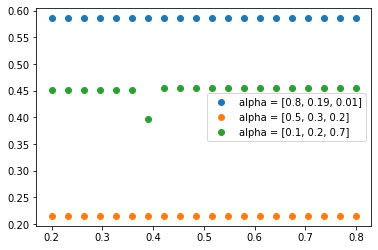

In [86]:
import matplotlib.pyplot as plt
i = 0

def min_dist(x_1, x_2):
    res = 0
    y_1 = np.sort(x_1)
    y_2 = np.sort(x_2)
    return np.linalg.norm(y_1 - y_2)

Alpha = [alpha_0, alpha_1, alpha_2]
i = 0
for alpha in RES:
    dist = []
    B = []
    for b in alpha:
        B.append(b[0])
        dist.append(min_dist(Alpha[i], b[1]))
    plt.plot(B, dist, "o", label = "alpha = {alpha}".format(alpha=Alpha[i]))
    plt.legend()
    #plt.title("distance between h_bar and true alpha for alpha = {}".format(Alpha[i]))

    i += 1
    
plt.show()